0       957
1       984
2       988
3      1005
4       994
5       961
6      1067
7      1397
8      2378
9      2763
10     3441
11     2556
12     2040
13     1820
14     2482
15     2829
16     3456
17     2832
18     2318
19     2085
20     1796
21     1816
22     1602
23     1806
24     2330
25     1949
26     2582
27     2012
28     1402
29     2706
30     2263
31     2324
32     2043
33     1348
34     2118
35     2107
36     2827
37     2951
38     1521
39      828
40     1375
41     1228
42     1438
43     1173
44      628
45     1392
46     1610
47     2693
48     2442
49     2770
50     2051
51     2392
52     2385
53     2211
54     3458
55     2948
56     2826
57     3458
58     2318
59     2578
60     3242
61     2982
62     2229
63     2876
64     1389
65     1778
66      928
67     1220
68      825
69      659
70      918
71     1135
72     1398
73     1653
74     3017
75     2054
76     1475
77     1157
78     1088
79     1509
80     1538
81     1432
82     1083
83  

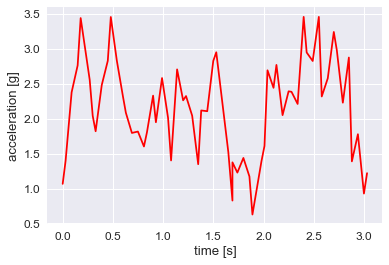

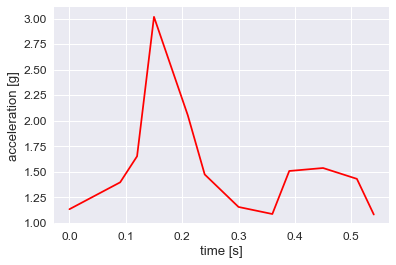

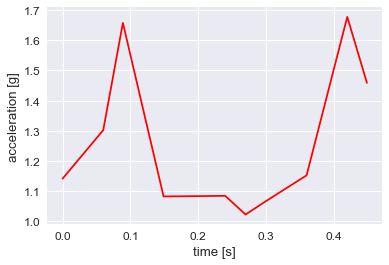

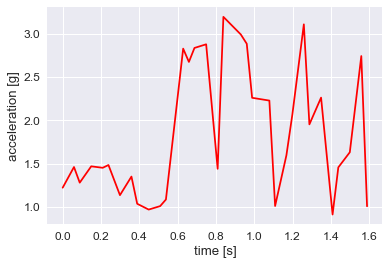

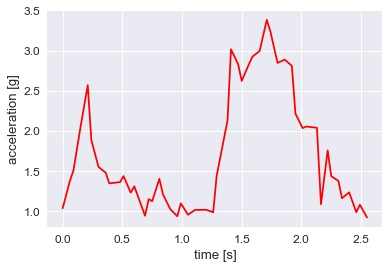

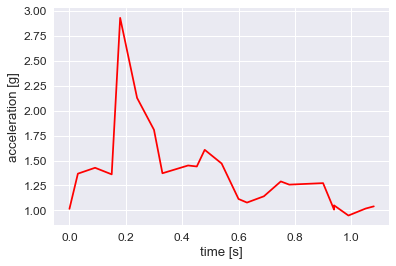

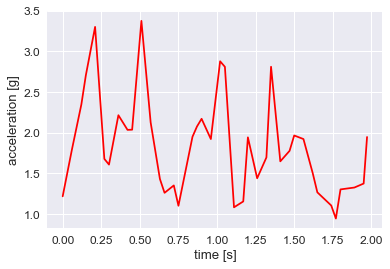

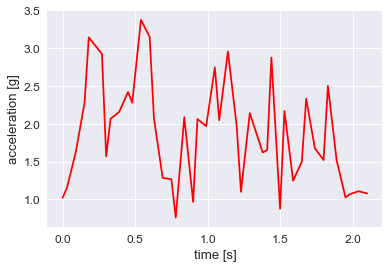

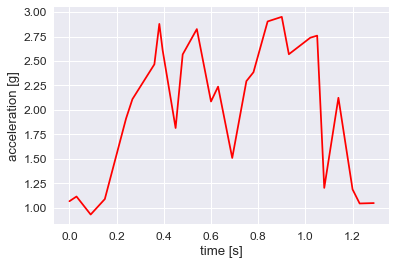

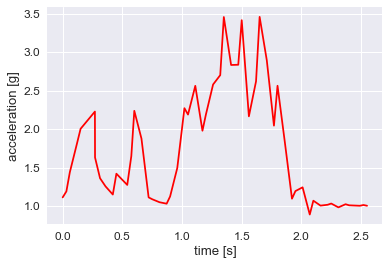

[6, 68, 71, 83, 86, 96, 98, 131, 137, 189, 192, 215, 217, 257, 261, 304, 309, 336, 339, 392]


In [12]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

df = pandas.read_csv('csv\KickSession_Accelerometer.csv', skiprows=4)
df.dropna(subset = ["Date"], inplace=True)
df2 = pandas.read_csv('csv/KickSession_Gyroscope.csv', skiprows=4)
df2.dropna(subset = ["Date"], inplace=True)

export_list = []
index = []

acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
acc = np.sqrt(acc)
acc = acc.astype('int64')
pandas.set_option('display.max_rows', None)

foundStart = False
foundEnd = False
print(acc)
for i, j in enumerate(acc[:-1]):   

    if (j>1000)and(j < acc[i+1])and(foundStart == False): 
        start = i
        foundStart = True
        foundEnd = False
        index.append(start)
    elif (j > acc[i+1])and(j < 1000)and(foundEnd == False)and(foundStart == True):
        end = i
        foundStart = False
        foundEnd = True
        index.append(end)      
        
        acc_copy=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000
        acc_copy=np.array(acc_copy)/1000
        df2_copy=df2.iloc[start:end]

        HostTime = np.array(HostTime)
        
        export_list.append([acc_copy.mean(), acc_copy.std(), acc_copy.min(), acc_copy.max(), df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2_copy['X (dps)'].max()
                   , df2_copy['Y (dps)'].mean(), df2_copy['Y (dps)'].std(), df2_copy['Y (dps)'].min(), df2_copy['Y (dps)'].max()
                   , df2_copy['Z (dps)'].mean(), df2_copy['Z (dps)'].std(), df2_copy['Z (dps)'].min(), df2_copy['Z (dps)'].max()])
        
        plt.plot(HostTime,acc_copy,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
        plt.show()

print(index)      
   
with open('Accelerometer_TestResult.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)
    

In [3]:
def Kick(feature1, feature2):
    if(model.predict([[feature1, feature2]]))==1:
        print('Turning Kick!')
    elif(model.predict([[feature1, feature2]]))==2:
        print('AxeKick!')
    elif(model.predict([[feature1, feature2]]))==3:
        print('CutKick!')
    elif(model.predict([[feature1, feature2]]))==4:
        print('CrescentKick!')
        

In [4]:
Kick(1.24125, -433.1)

NameError: name 'model' is not defined

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn import svm
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer_TestResult.csv')

sns.lmplot('GyrZ_min', 'GyrZ_mean',
           data=data,
           #hue='kick_Type',
           #col='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

X = data[['GyrZ_min','GyrZ_mean']].values
y = data['std']
model = svm.SVC(kernel='linear').fit(X, y)

sns.lmplot('GyrZ_min', 'GyrZ_mean',
           data=data,
           #hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = (x_max / x_min) / 20 

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('GyrZ_min Z (dps)')
plt.ylabel('GyrZ_mean Z (dps)')
plt.title("Different kicking group")